#### Import all libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

load the data

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
# df.head()


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)
             

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

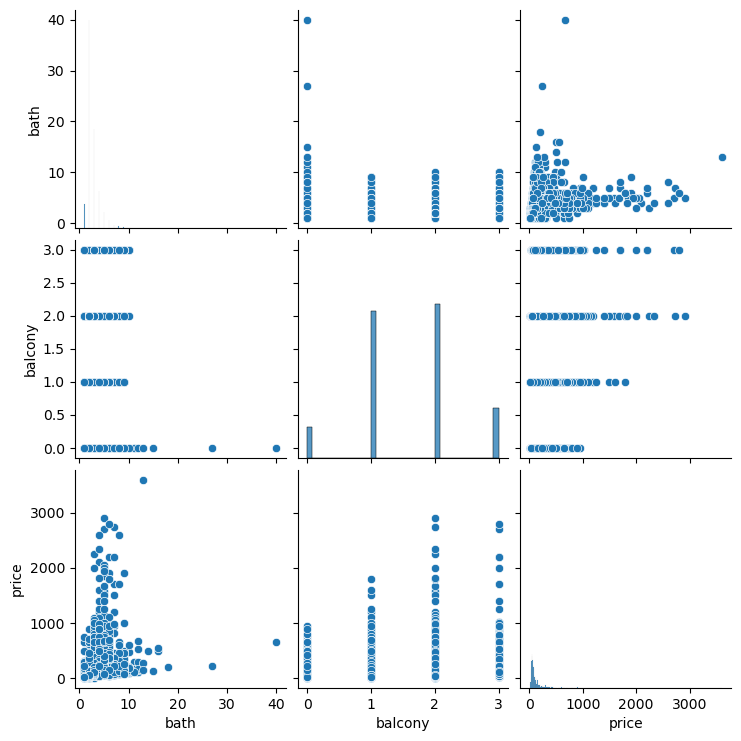

In [8]:
sns.pairplot(df)

### Data Cleaning

In [9]:
df.isnull().sum() #find the missing data in dataset


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.isnull().mean()*100 #%of missing value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

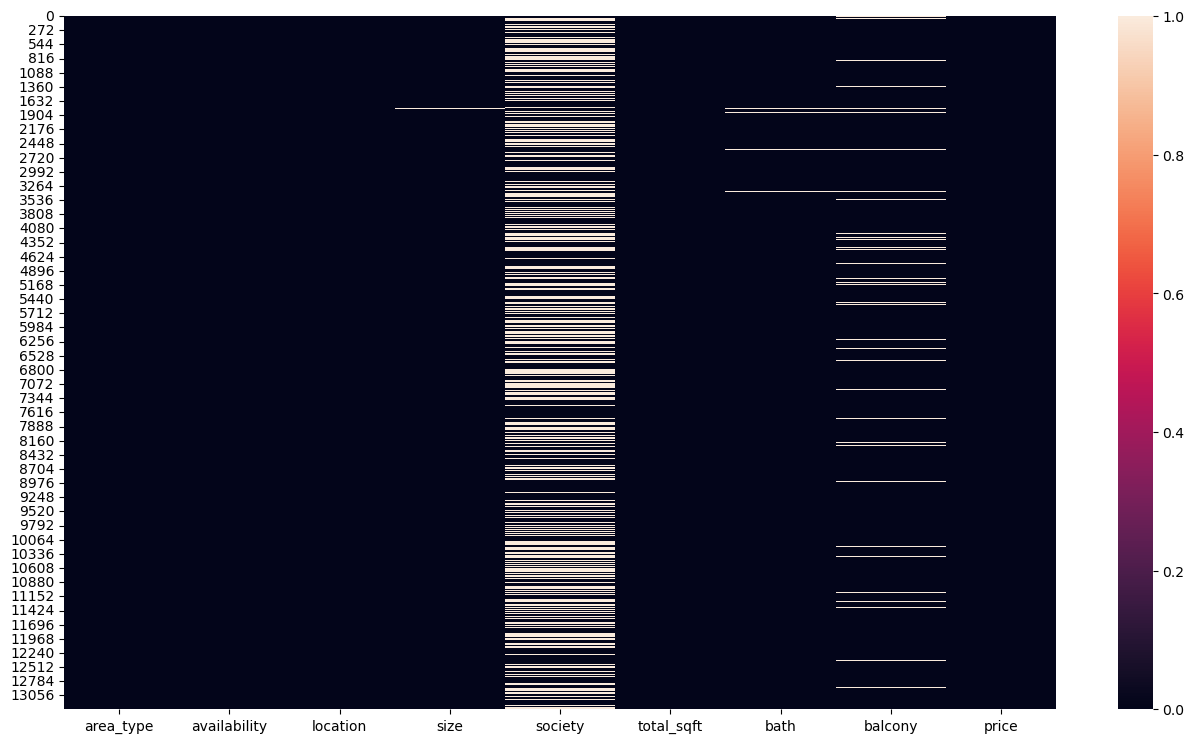

In [11]:
#visulaize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [13]:
# Drop the columns areatype,availabilty,balcony

# df.drop(columns=['area_type','availability','balcony'],inplace = True)

df.drop(columns=['area_type','availability','balcony'],inplace=True)

In [14]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [16]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [17]:
df['location']=df['location'].fillna("Sarjapur Road")

In [18]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [19]:
df['bath']=df['bath'].fillna(df['bath'].median())


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [21]:

df['bhk'] = df['size'].apply(lambda x: int(str(x).split()[0]) if not pd.isna(x) else np.nan)


In [22]:
# find the unique value in the column

df['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [23]:
df[df.bhk>20]

,location,size,society,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,NaN,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,NaN,2400,40.0,660.0,43.0


#### Converting "Total_sqft" feature in numeric

In [24]:
df['total_sqft'].unique()

# here we observe that 'totalsqft' contain string value in diff format
#float,int like value 1689,28,81:
# range value : 540-760
# number and string : 142.54sq,Meter,117sq,yards,1Grounds.
#best strategy is to convert it into number by splitting it 



array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])*float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [27]:
df.head()

,location,size,society,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2.0


### Price Per Square Feet

In [28]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [29]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [30]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,1.327400e+04,13320.000000,13320.000000,13304.000000,1.327400e+04
mean,3.757339e+04,2.688814,112.565627,2.803743,7.829339e+03
std,4.748489e+05,1.338754,148.971674,1.294974,1.064333e+05
min,1.000000e+00,1.000000,8.000000,1.000000,1.180556e+00
25%,1.100000e+03,2.000000,50.000000,2.000000,4.210526e+03
50%,1.284000e+03,2.000000,72.000000,3.000000,5.412952e+03
75%,1.700000e+03,3.000000,120.000000,3.000000,7.288013e+03
max,1.606028e+07,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: count, Length: 1306, dtype: int64

In [32]:
df['loaction']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

In [33]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
Nagappa Reddy Layout              10
BTM 1st Stage                     10
1st Block Koramangala             10
Kalkere                           10
Naganathapura                     10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Uvce Layout                        1
Abshot Layout                      1
Name: count, Length: 1065, dtype: int64

In [34]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [35]:
df['location'].value_counts()

location
other                 2901
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

### Outlier Detection and Removal

In [36]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,1.327400e+04,13320.000000,13320.000000,13304.000000,1.327400e+04
mean,3.757339e+04,2.688814,112.565627,2.803743,7.829339e+03
std,4.748489e+05,1.338754,148.971674,1.294974,1.064333e+05
min,1.000000e+00,1.000000,8.000000,1.000000,1.180556e+00
25%,1.100000e+03,2.000000,50.000000,2.000000,4.210526e+03
50%,1.284000e+03,2.000000,72.000000,3.000000,5.412952e+03
75%,1.700000e+03,3.000000,120.000000,3.000000,7.288013e+03
max,1.606028e+07,40.000000,3600.000000,43.000000,1.200000e+07


In [37]:
(df['total_sqft']/df['bhk']).describe()

count    1.325800e+04
mean     1.064734e+04
std      1.171272e+05
min      2.500000e-01
25%      4.750000e+02
50%      5.540000e+02
75%      6.275000e+02
max      4.015069e+06
dtype: float64

In [38]:
df=df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,1.251400e+04,12514.000000,12514.000000,12514.000000,12514.000000
mean,3.823204e+04,2.560253,111.398333,2.651670,6225.951818
std,4.828683e+05,1.078441,152.098807,0.977025,4225.865412
min,3.000000e+02,1.000000,9.000000,1.000000,1.867963
25%,1.125000e+03,2.000000,49.000000,2.000000,4166.666667
50%,1.306000e+03,2.000000,70.000000,3.000000,5270.049366
75%,1.724000e+03,3.000000,115.000000,3.000000,6896.551724
max,1.606028e+07,16.000000,3600.000000,16.000000,176470.588235


In [39]:
df.shape

(12514, 9)

In [40]:
df.price_per_sqft.describe()

count     12514.000000
mean       6225.951818
std        4225.865412
min           1.867963
25%        4166.666667
50%        5270.049366
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_outlier_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outlier_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10418.000000,10418.000000,10418.000000,10418.000000,10418.000000
mean,1498.377576,2.468804,90.265110,2.571319,5634.153774
std,867.496959,0.970841,85.600358,0.892811,2271.716433
min,300.000000,1.000000,9.000000,1.000000,1250.000000
25%,1108.000000,2.000000,48.232500,2.000000,4200.000000
50%,1280.000000,2.000000,66.000000,2.000000,5147.230862
75%,1643.000000,3.000000,100.000000,3.000000,6423.276831
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [42]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [43]:
df=bhk_outlier_remover(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7423 entries, 1 to 10417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7423 non-null   object 
 1   size            7423 non-null   object 
 2   society         4822 non-null   object 
 3   total_sqft      7423 non-null   float64
 4   bath            7423 non-null   float64
 5   price           7423 non-null   float64
 6   bhk             7423 non-null   float64
 7   price_per_sqft  7423 non-null   float64
 8   loaction        7423 non-null   object 
dtypes: float64(5), object(4)
memory usage: 579.9+ KB


In [44]:
df.shape

(7423, 9)

In [45]:
df

,location,size,society,total_sqft,bath,price,bhk,price_per_sqft,loaction
1,Devarachikkanahalli,2 BHK,Clntsrt,1250.0,2.0,40.0,2.0,3200.000000,Devarachikkanahalli
2,Devarachikkanahalli,2 Bedroom,NaN,1200.0,2.0,83.0,2.0,6916.666667,Devarachikkanahalli
3,Devarachikkanahalli,2 BHK,NaN,1170.0,2.0,40.0,2.0,3418.803419,Devarachikkanahalli
4,Devarachikkanahalli,3 BHK,Shireru,1425.0,2.0,65.0,3.0,4561.403509,Devarachikkanahalli
5,Devarachikkanahalli,2 BHK,NaN,947.0,2.0,43.0,2.0,4540.654699,Devarachikkanahalli
...,...,...,...,...,...,...,...,...,...
10409,other,2 BHK,NaN,1200.0,2.0,70.0,2.0,5833.333333,Hennur Bande
10410,other,1 BHK,NaN,1800.0,1.0,200.0,1.0,11111.111111,12th cross srinivas nagar banshankari 3rd stage
10413,other,2 BHK,OlarkLa,1353.0,2.0,110.0,2.0,8130.081301,VHBCS Layout
10414,other,1 Bedroom,NaN,812.0,1.0,26.0,1.0,3201.970443,Weavers Colony


In [46]:
df=bhk_outlier_remover(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6814 entries, 1 to 10417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        6814 non-null   object 
 1   size            6814 non-null   object 
 2   society         4426 non-null   object 
 3   total_sqft      6814 non-null   float64
 4   bath            6814 non-null   float64
 5   price           6814 non-null   float64
 6   bhk             6814 non-null   float64
 7   price_per_sqft  6814 non-null   float64
 8   loaction        6814 non-null   object 
dtypes: float64(5), object(4)
memory usage: 532.3+ KB


In [47]:
df.drop(columns=['size','price_per_sqft','society'],inplace=True)

### Clean Data of DataSet

In [48]:
df.head()

,location,total_sqft,bath,price,bhk,loaction
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,Devarachikkanahalli
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,Devarachikkanahalli
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,Devarachikkanahalli
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,Devarachikkanahalli
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,Devarachikkanahalli


### create independent and dependent data

In [49]:
x=df.iloc[:,[1,2,4]].values
y=df['price']

### spliting the data into 80 to 20 parts

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

In [52]:
X_train

array([[1.050e+03, 2.000e+00, 2.000e+00],
       [1.670e+03, 3.000e+00, 3.000e+00],
       [1.852e+03, 3.000e+00, 3.000e+00],
       ...,
       [4.300e+03, 5.000e+00, 4.000e+00],
       [1.870e+03, 3.000e+00, 3.000e+00],
       [1.245e+03, 2.000e+00, 2.000e+00]])

In [53]:
X_test

array([[1282.,    2.,    2.],
       [1063.,    2.,    2.],
       [ 980.,    2.,    2.],
       ...,
       [1315.,    3.,    3.],
       [1270.,    2.,    3.],
       [1454.,    3.,    3.]])

### processing the data

In [54]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(X_train)
x_test=st.transform(X_test)

### Apply ML Algorithm

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

### Create predict data

In [62]:
y_pred=lr.predict(x_test)
y_pred

array([81.62975716, 58.83456323, 50.19528882, ..., 78.70970512,
       69.24361088, 93.17788757])

### The last and final step for the Dataset is Visualization and Showing the data in the form of Graph

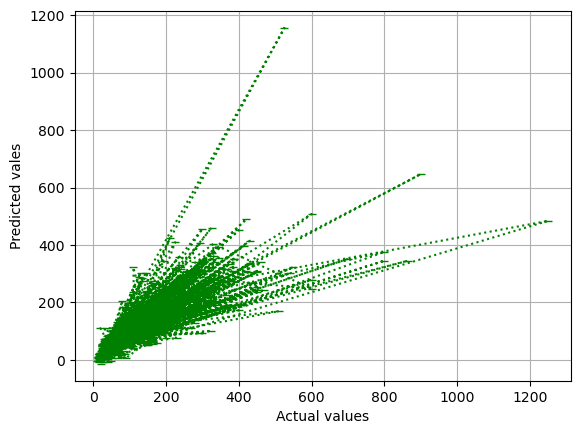

In [63]:
plt.grid()
plt.plot(y_test,y_pred,":_g")
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()

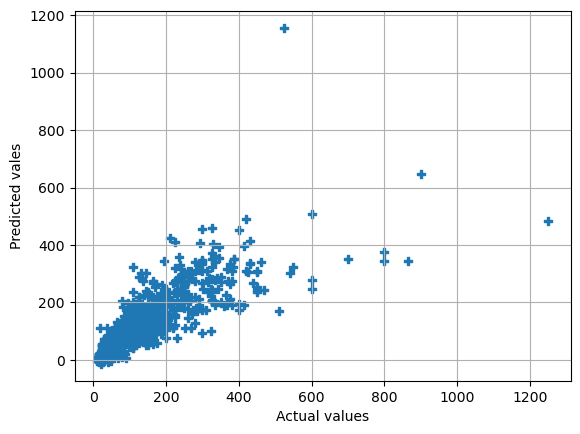

In [64]:
plt.grid()
plt.scatter(y_test,y_pred,marker="P")
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()

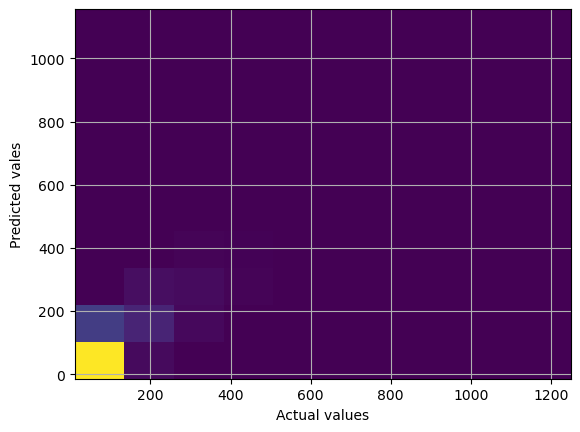

In [65]:
plt.grid()
plt.hist2d(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()

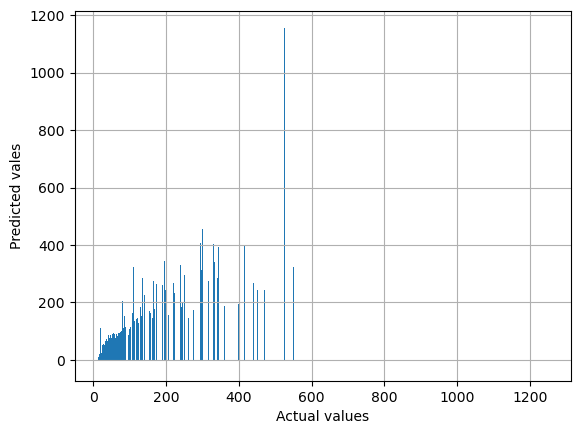

In [66]:
plt.grid()
plt.bar(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted vales")
plt.show()